In [31]:
### extract the amplitude envelope of signal
# 0. import the necessary packages

import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [32]:
# 1. load the audio file
wave_path = r"/root/autodl-tmp/speech@24kHz.wav"
waveform, sample_rate = librosa.load(wave_path, sr=None)

In [33]:
# 2. define a function AE that can extract the maximum amplitude of each frame and combine them as the envelope of signal
def Calc_Amplitude_Envelope(waveform,frame_length,hop_length):
    if len(waveform ) % hop_length !=0:
        frame_num = int((len(waveform)-frame_length)/hop_length)+1
        pad_num = frame_num*hop_length+frame_length - len(waveform)
        waveform = np.pad(waveform,(0,pad_num),mode ="wrap")
    frame_num = int((len(waveform)-frame_length)/hop_length)+1
    waveform_ae = []
    for t in range(frame_num):
        current_frame = waveform[t*(frame_length - hop_length):t*(frame_length - hop_length)+frame_length]
        current_ae = max(current_frame)
        waveform_ae.append(current_ae)
    return np.array(waveform_ae)




In [34]:
# 3. set the parameters
frame_size  = 1024
hop_size = int(frame_size*0.5)
waveform_AE = Calc_Amplitude_Envelope(waveform = waveform,frame_length =frame_size,hop_length=hop_size)

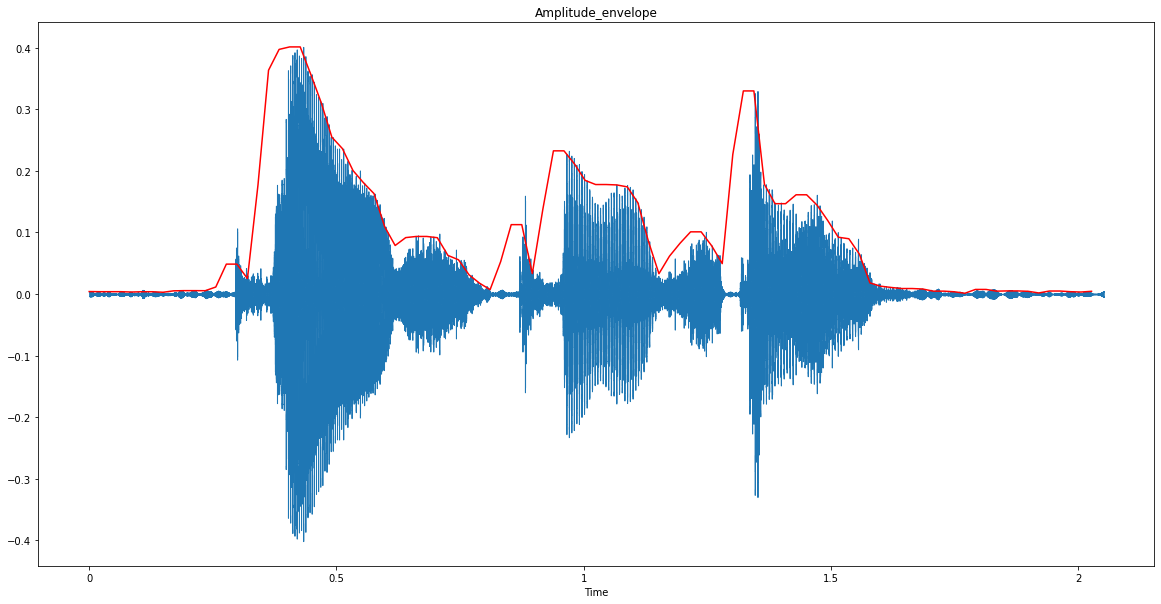

In [39]:
# 4. plot the wave  form and its amplitude envelope
frame_scale = np.arange(0,len(waveform_AE))
time_scale = librosa.frames_to_time(frame_scale, sr=sample_rate, hop_length=hop_size)

plt.figure(figsize=(20, 10))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Amplitude_envelope')
plt.plot(time_scale,waveform_AE,color="red")

